In [1]:
%matplotlib inline


# Digital Image Basics





### our image backbone libraries

In [2]:
#import libraries
import numpy as np
from matplotlib import pyplot as plt
#from PIL import Image
from skimage import data, io, color
import imageio.v3 as iio

### libraries generally good to have around

In [3]:
import os
import glob
import numpy as np
import ipywidgets as widgets
import sys
import skimage

In [4]:
# configure our data
pict1 = "france_cc0.jpg"

### This tutorial uses skimage mostly, and here metadata is not relevant, so let's go with that for opening, although you can use imageio- your choice

## Exercise one: open and information

In [16]:
#from skimage
image_h = io.imread(pict1)

# # from imageio
# image_h = iio.imread(pict1)

## Information and show:

In [17]:
print(image_h.shape)
print(image_h.size)
print(image_h.min())

(280, 390, 3)
327600
0


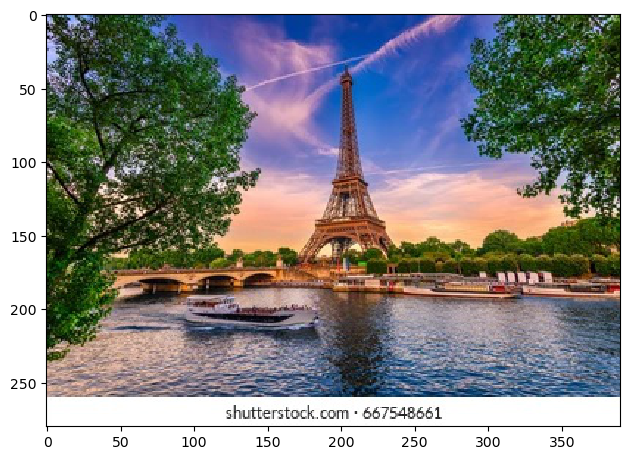

In [18]:
io.imshow(image_h)

We can open an imagein PIL or Pillow (or opencv for that matter)

In [19]:
# #read the image in PIL
# im = Image.open(pict1)
# im

In PIL we split channels differently than in Skimage

In [20]:
# red, green, blue = im.split()
# fig, axis = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 6))
# x = (red, green, blue)
# #axis[0].grid(True)
# axis[0].set(title='red')
# axis[0].imshow(x[0])
# axis[1].set(title='green')
# axis[1].imshow(x[1])
# axis[2].set(title='blue')
# axis[2].imshow(x[2])


## Exercises 2 and 3: In skimage show all the rows, half the columns (top half), and only the blue channel 

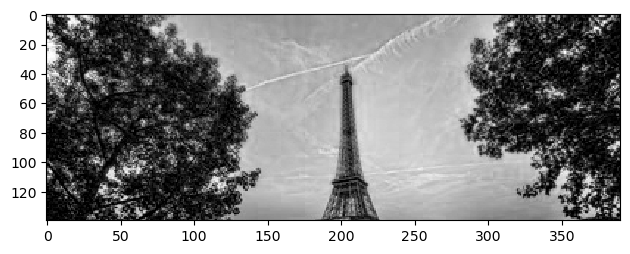

In [21]:
io.imshow(image_h[:140, :,2] )  # [columns, rows, channels], [red, green, blue]

## Working with skimage lecture

Exercise prefilled on resizing.

In [22]:
new_shape = (image_h.shape[0] // 10, image_h.shape[1] // 10, image_h.shape[2])
small = skimage.transform.resize(image=image_h, output_shape=new_shape)
small = skimage.util.img_as_ubyte(small)

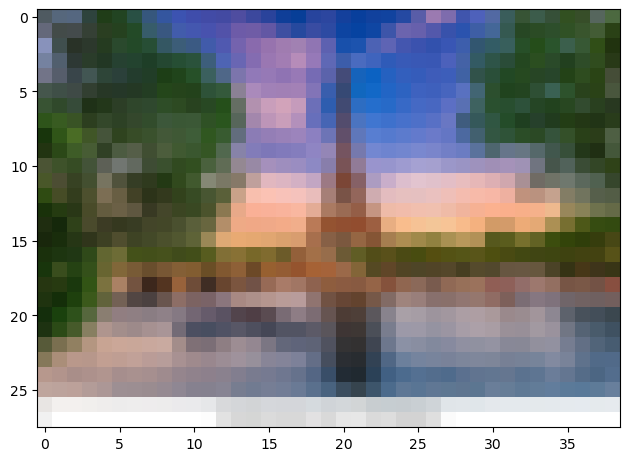

In [23]:
io.imshow(small)

In [24]:
# write out i.e. saveimage
iio.imwrite(uri="resized.jpg", image=small)

### supersimple thresholiding

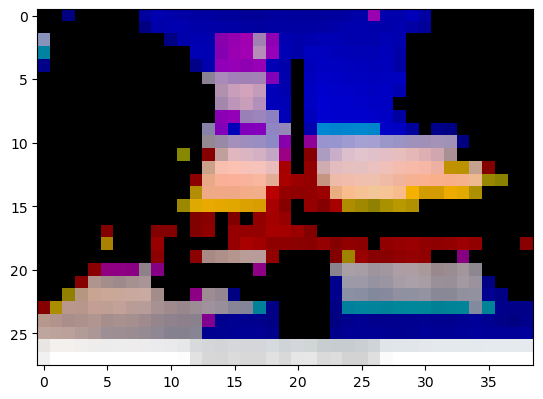

In [25]:
# would be better on an image we want to clean- find better example?
small[small < 128] = 0

# display modified image
fig, ax = plt.subplots()
plt.imshow(small)

#### slicing covered previously ie.e image [start:stop,:start:stop, :]

## Getting fancy

In [ ]:
# # masking
# #lket's turn all the light values black, just because we can
# mask = image_h > 116
# # Set black (0) the pixels where mask is True
# mage_h[mask] = 0
# io.imshow(mage_h)

In [ ]:
# # Ok how about a geographic mask?
# nrows, ncols, depth = image_h.shape
# row, col = np.ogrid[:nrows, :ncols]
# cnt_row, cnt_col = nrows / 2, ncols / 2
# #outer_disk_mask = 
# outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
# mage_h[outer_disk_mask] = 0
# io.imshow(mage_h)


We can also mask in color. Let's go step by step, first showing where the colors are

In [ ]:
mage_h = io.imread(pict1)
plt.imshow(mage_h[:,:,1], cmap='gray')

In [ ]:
#mage_h = io.imread(pict1)
fig, (ax_1,ax_2,ax_3, ax_4) = plt.subplots(nrows = 4, figsize=(6, 14))
ax_1.imshow(mage_h[:,:,0], cmap='gray')
ax_1.set(title='red, layer 0')
ax_2.imshow(mage_h[:,:,1], cmap='gray')
ax_2.set(title='green, layer 1')
ax_3.imshow(mage_h[:,:,2], cmap='gray')
ax_3.set(title='blue, layer 2')
ax_4.imshow(mage_h[:,:,:],cmap='gray')
ax_4.set(title='all layers')

Now let;s see where red is hot

In [ ]:
reddish = mage_h[:, :, 0] > 100
plt.imshow(reddish, cmap ='gray')

In [ ]:
# let's make red green to be fair and share the burdem
mage_h[reddish] = [0, 255, 0]
plt.imshow(mage_h)

In [ ]:
# nah, let a red be a red
mage_h = io.imread(pict1)
reddish = mage_h[:, :, 0] > 100
mage_h[reddish] = [255, 0, 0]
plt.imshow(mage_h)

Fundamentally, you now need to understand digital images as matrices, or stacked matrices or an multidimension array... and whatever library you use you will be fine. 
By the way numpy as a way to have these arrays has it's advantages

In [ ]:
 np.lookfor('boundaries', 'skimage') 

Remeber it's all just a big numpy array...
sometimes you might want to transform it

Function names:
	Description

img_as_float
	Convert to floating point (integer types become 64-bit floats)

img_as_ubyte
	Convert to 8-bit uint.

img_as_uint
	Convert to 16-bit uint.

img_as_int
	Convert to 16-bit int.

In [ ]:
# example
mage_h = io.imread(pict1)
mage_h

SO we see dtype here, but we could also check

In [ ]:
mage_h.dtype

In [ ]:
from skimage.util import img_as_ubyte
res_h = io.imread("hi_res_cc0.jpg")
res_h.dtype
# less_info = img_as_ubyte(mage_h)
io.imshow(res_h)


In [ ]:
from skimage import util

inverted_img = util.invert(res_h)
io.imshow(inverted_img)

In [ ]:
 np.lookfor('denoise', 'skimage') 

In [ ]:
from skimage import exposure
hist = exposure.histogram(res_h)
hist

In [ ]:
plt.plot(hist[1],hist[0])

# The histogram is the basis for a lot of manipulations....
In skikmage.exposure we can use rescale intensity though

# For rescaling go straight into the documentation here:
https://scikit-image.org/docs/stable/user_guide/geometrical_transform.html#cropping-resizing-and-rescaling-images

# Getting fancy?

Any geometrical transformation you can code, 

# More fancy, but automated?

Built in -feature detection
By the way feature detection of edges is one way to go for segmentation

# Going genius?

check out the denoising algorithms, then write your own
